# Proyecto 1
**Ciencias de Datos en Python**
*Diego Morales*

El proyecto consiste la creación de modelos predictivos utilizando regresión lineal uni-variable a partir de conocimientos de programación básicos en Python y apoyándose en librerías principales como Numpy, Pandas, Matplotlib y Seaborn.

La ecuación del modelo de regresión lineal es la siguiente:

$y = \beta_1 \cdot x + \beta_0$

Donde:
- $y$ es la variable dependiente
- $x$ es la variable independiente
- $\beta_0$ es el intercepto de la recta
- $\beta_1$ es la pendiente de la recta

### Listado de Contenidos
- [Importación](#Importacion)
- [Conjuntos de Datos](#Conjuntos-de-Datos)
- [Análisis Exploratorio](#Analisis-Exploratorio)
- [Histogramas](#Histogramas)
- [Variables Independientes](#Variables-Independientes)
- [Modelo de Regresión Lineal](#Modelo-de-Regresion-Lineal)
- [Variable 1: OverllQual](#Variable-1:-OverllQual)
- [Variable 2: 1stFlrSF](#Variable-2:-1stFlrSF)


## Importacion

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

dataset = np.load('proyecto_training_data.npy')
dataset.shape

(1460, 6)

## Conjuntos de Datos

In [2]:
def split_dataset(dataset, per_train_set=0.8):
    n = int(len(dataset)*per_train_set)
    train_set = dataset[:n]
    test_set = dataset[n:]
    return train_set, test_set

train_set, test_set = split_dataset(dataset)

## Analisis Exploratorio

In [3]:
df = pd.DataFrame(dataset, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Histogramas

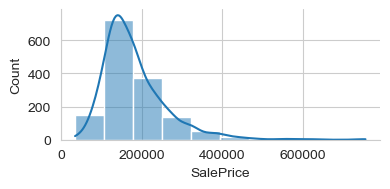

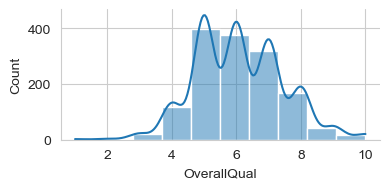

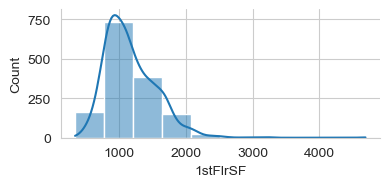

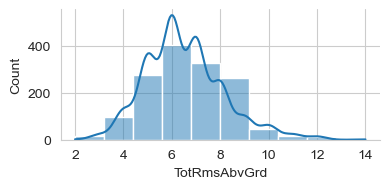

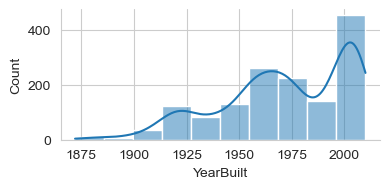

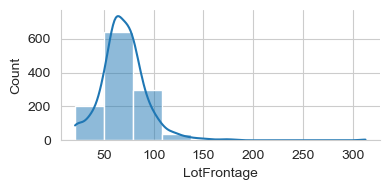

In [4]:
columns = df.columns

for column in columns:
    sns.displot(data=df, x=column, kind='hist', kde=True, bins=10, height=2, aspect=2)

## Variables Independientes

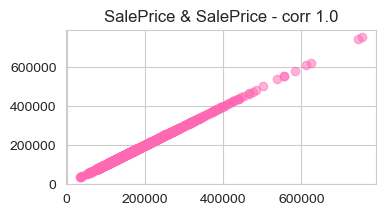

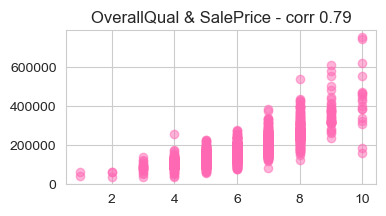

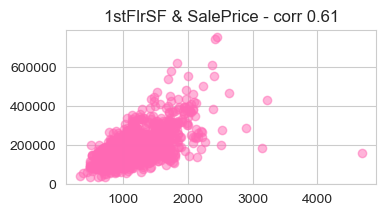

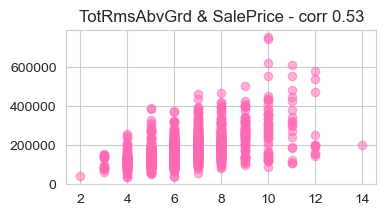

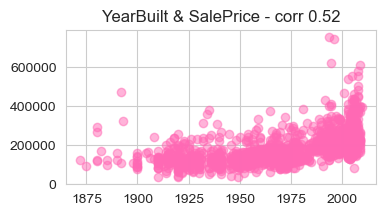

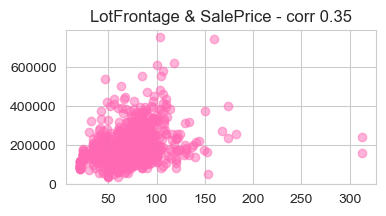

In [5]:
for column, corr in df.corr().iloc[0].items():
    plt.figure(figsize=(4,2))
    plt.scatter(x=df[column], y=df['SalePrice'], color='hotpink', alpha=0.5)
    plt.title(f'{column} & SalePrice - corr {round(corr, 2)}')
    plt.show()
    

## Modelo de Regresion Lineal

In [6]:
class RegresionLineal:
    '''Modelo de Regresión Lineal
    Atributes:
        beta: vector de coeficientes beta (se inicializan en cero)
        beta_history: diccionario con vector de coeficientes beta para cada epoch
        loss_history: diccionario con error (loss) para cada epoch
        x: array con valores x utilizados durante entrenamiento (se inicializa en cero)
        y: array con valores y utilizados durante entrenamiento (se inicializa en cero)
        learning_rate: tasa de aprendizaje utilizada durante entrenamiento (se inicializa en cero)
    '''
    def __init__(self):
        self.beta = np.array([[0], [0]])
        self.beta_skl = np.array([[0], [0]])
        self.beta_history = {}
        self.loss_history = {}
        self.x = np.array([0])
        self.y = np.array([0])
        self.learning_rate = 0

    def train(self, x, y, epochs, print_iter=1, learning_rate=0.01):
        '''train
        Parameters:
            x : array de variable independiente
            y : array de variable dependiente
            epochs : int con el número de interaciones
            print_iter : int que indica cada cuánto imprimir los resultados (por defecto, 1)
            learning_rate : float para tasa de aprendizaje (por defecto, 0.01)
        Returns:
            beta : array con coeficientes de modelo de regresión lineal
            results : lista con resultado de error (loss) y coeficientes (beta) para cada iteración (epoch)
        '''
        self.x = x
        self.y = y
        self.beta = np.random.rand(2, 1)
        self.learning_rate = learning_rate
        reg = LinearRegression().fit(x.reshape(-1, 1), y)
        self.beta_skl = np.array([[reg.coef_[0]], [reg.intercept_]])
        x = np.array([x, np.ones(shape=x.shape)]).transpose()
        for epoch in range(1, epochs+1):
            y_pred = np.dot(x, self.beta).transpose()
            loss = np.sum(np.square(y - y_pred))/(2*len(y))
            gradient_loss = (np.dot(y_pred - y, x)/len(y)).reshape(2, 1)
            self.beta -= learning_rate*gradient_loss
            if epoch%print_iter==0:
                print(f'{epoch=} {loss=:,.2f} {self.beta=}')
            self.loss_history[epoch] = loss
            self.beta_history[epoch] = self.beta.copy()

        return self.beta_history, self.loss_history

    def plot_loss(self):
        assert len(self.loss_history)>0, '[WARNING] El modelo no ha sido entrenado'
        plt.figure(figsize=(8, 4))
        plt.plot(list(self.loss_history.values()), color='aqua', alpha=0.5)
        plt.title(f'Loss History')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()

    def plot_beta(self, plot_iter=1):
        assert len(self.beta_history)>0, '[WARNING] El modelo no ha sido entrenado'
        plt.figure(figsize=(8, 4))
        plt.scatter(x=self.x, y=self.y)
        legends = ['dataset', f'y_skl = {self.beta_skl[0][0]:,.2f}x+{self.beta_skl[1][0]:,.2f}']
        x_axis = np.arange(self.x.max())
        x = np.array([x_axis, np.ones_like(x_axis)]).transpose()
        y = np.dot(x, self.beta_skl)
        plt.plot(y, alpha=0.5)
        for epoch, beta in enumerate(list(self.beta_history.values())):
            epoch += 1
            if epoch%plot_iter==0:
                y = np.dot(x, beta)
                plt.plot(y, alpha=0.5)
                legends.append(f'y_{epoch} = {beta[0][0]:,.2f}x+{beta[1][0]:,.2f}')
        plt.legend(legends)
        plt.title(f'Beta History')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    
    def evaluate(self, x, y):
        assert len(self.beta_history)>0, '[WARNING] El modelo no ha sido entrenado'
        x = np.array([x, np.ones(shape=x.shape)]).transpose()
        y_pred_manual = np.dot(x, self.beta).transpose()
        y_pred_skl = np.dot(x, self.beta_skl).transpose()
        y_pred_ensemble = np.mean([y_pred_manual, y_pred_skl], axis=0)
        loss_manual = np.sum(np.square(y - y_pred_manual))/(2*len(y))
        loss_skl = np.sum(np.square(y - y_pred_skl))/(2*len(y))
        loss_ensemble = np.sum(np.square(y - y_pred_ensemble))/(2*len(y))
        print(f'{loss_manual=:,.2f}')
        print(f'{loss_skl=:,.2f}')
        print(f'{loss_ensemble=:,.2f}')
        losses = {'loss_manual': loss_manual,
                    'loss_skl': loss_skl,
                    'loss_ensemble': loss_ensemble}
        plt.figure(figsize=(8, 4))
        for name, loss in losses.items():
            plt.bar(x=f'{name}={loss:.2E}', height=loss)
        plt.title(f'Loss Comparison')
        plt.ylabel('loss')
        plt.ylim([0.999*min(losses.values()), 1.001*max(losses.values())])
        plt.show()


## Variable 1: OverllQual

epoch=200 loss=1,352,190,930.42 self.beta=array([[31052.81081774],
       [-4509.71605082]])
epoch=400 loss=1,316,766,077.23 self.beta=array([[ 32350.44780711],
       [-12820.11006847]])
epoch=600 loss=1,287,454,593.87 self.beta=array([[ 33530.8175972],
       [-20379.4954147]])
epoch=800 loss=1,263,201,478.34 self.beta=array([[ 34604.51760172],
       [-27255.74059531]])
epoch=1000 loss=1,243,133,793.41 self.beta=array([[ 35581.1875482 ],
       [-33510.58085258]])


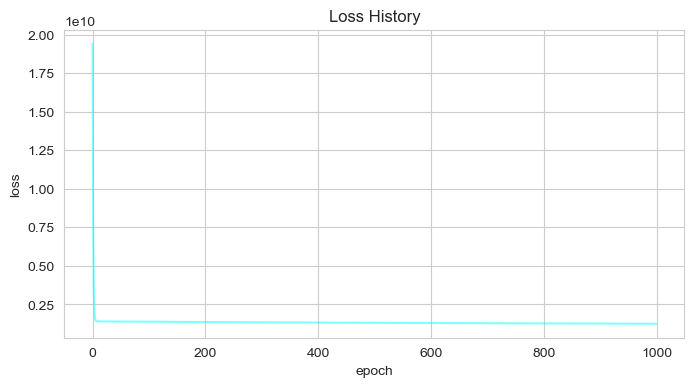

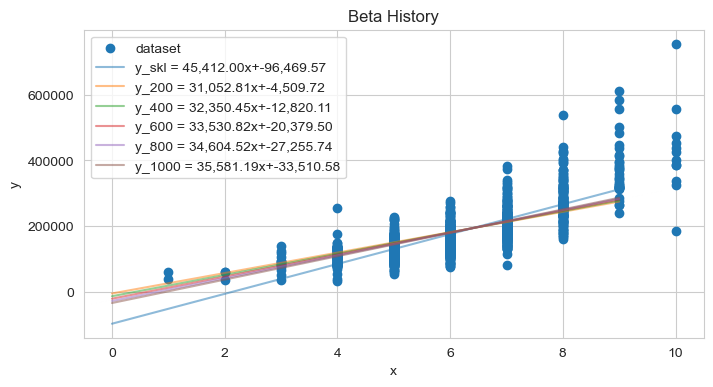

loss_manual=1,410,972,805.47
loss_skl=1,315,091,304.47
loss_ensemble=1,338,089,372.15


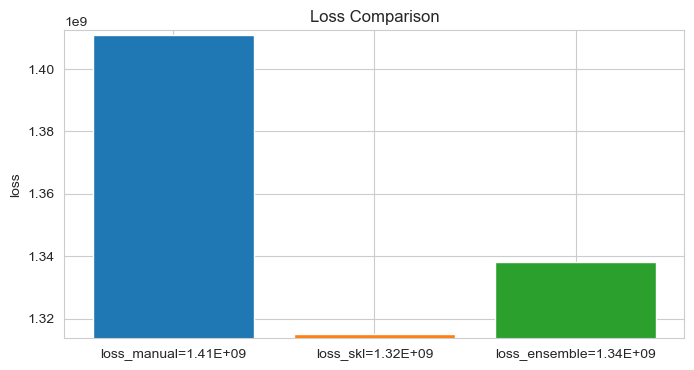

In [7]:
y_train = train_set[:, 0] #SalePrice
x_train = train_set[:, 1] #OverallQual
y_test = test_set[:, 0] #SalePrice
x_test = test_set[:, 1] #OverallQual

model = RegresionLineal()
beta_history, loss_history = model.train(x_train, y_train, 1000, 200, 0.01)
model.beta_history
model.plot_loss()
model.plot_beta(200)
model.evaluate(x_test, y_test)

## Variable 2: 1stFlrSF

epoch=20 loss=1,968,092,677.80 self.beta=array([[153.6968946 ],
       [  0.26583521]])
epoch=40 loss=1,968,092,513.44 self.beta=array([[153.69690575],
       [  0.32316711]])
epoch=60 loss=1,968,092,349.09 self.beta=array([[153.69686086],
       [  0.38049886]])
epoch=80 loss=1,968,092,184.75 self.beta=array([[153.69681596],
       [  0.43783051]])
epoch=100 loss=1,968,092,020.40 self.beta=array([[153.69677107],
       [  0.49516205]])


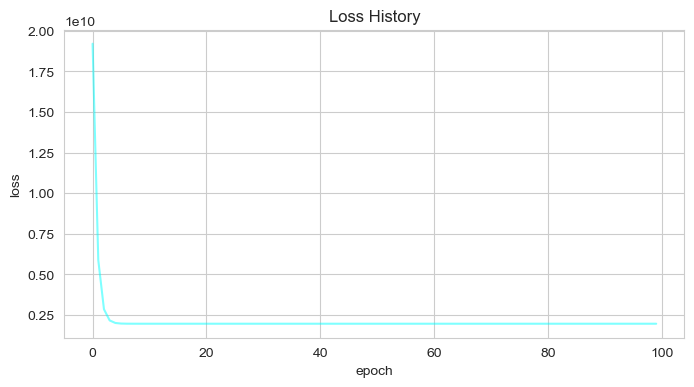

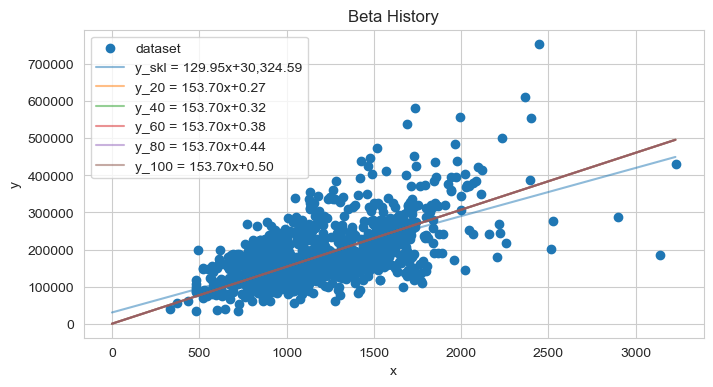

loss_manual=2,437,911,931.83
loss_skl=2,292,769,137.35
loss_ensemble=2,351,559,123.99


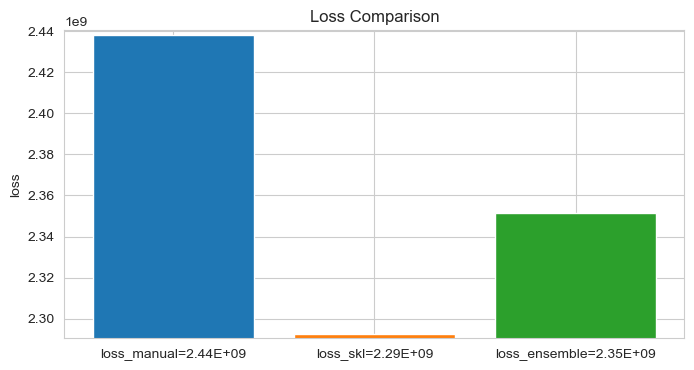

In [8]:
y_train = train_set[:, 0] #SalePrice
x_train = train_set[:, 2] #1stFlrSF
y_test = test_set[:, 0] #SalePrice
x_test = test_set[:, 2] #1stFlrSF

model = RegresionLineal()
beta_history, loss_history = model.train(x_train, y_train, 100, 20, 0.000001)
model.beta_history
model.plot_loss()
model.plot_beta(20)
model.evaluate(x_test, y_test)